In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Berlin_dfmguest.csv',
                   encoding='utf8')

In [3]:
df.head(2)

,Unnamed: 0,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_id,room_type
0,0,8.0,10.0,10.0,0.057015,1206,52.508112,13.258975,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,11850,1,4541865,Entire home/apt
1,1,1.0,2.0,2.0,0.057015,1206,52.489508,13.327372,30,3.0,Charlottenburg-Wilmersdorf,4.0,104.0,9,11850,1,3995729,Entire home/apt


In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)


In [5]:
cols_berlin = df.columns.tolist()
cols_berlin = cols_berlin[:13] + [cols_berlin[-3]]+ [cols_berlin[-4]] + [cols_berlin[-2]] + cols_berlin[-1:]
df = df[cols_berlin]

In [6]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type
0,8.0,10.0,10.0,0.057015,1206,52.508112,13.258975,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,1,11850,4541865,Entire home/apt
1,1.0,2.0,2.0,0.057015,1206,52.489508,13.327372,30,3.0,Charlottenburg-Wilmersdorf,4.0,104.0,9,1,11850,3995729,Entire home/apt


In [7]:
df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Berlin_IP.csv')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [9]:
df = df[df.price <= 1000]


In [10]:
df.shape

(14790, 17)

In [11]:
X = df[[x for x in df.columns if x not in ['bhk','price','latitude','longitude','room_id']]]
y = df.price.values
target = np.log(y)


In [12]:
formula = "target ~ "+' + '.join(X)+' -1'
formula

u'target ~ bathrooms + bedrooms + dist_arprt + host_count + metrostn_count + minstay + neighborhood + overall_satisfaction + rest_count + reviews + review_count + room_type -1'

In [13]:
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
y = y.values.ravel()

In [14]:
y

array([ 4.38202663,  4.6443909 ,  5.48063892, ...,  3.78418963,
        3.29583687,  3.78418963])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
X_train.shape, X_test.shape

((10353, 24), (4437, 24))

In [17]:
X_test.head(2)

,neighborhood[Charlottenburg-Wilmersdorf],neighborhood[Friedrichshain-Kreuzberg],neighborhood[Lichtenberg],neighborhood[Marzahn-Hellersdorf],neighborhood[Mitte],neighborhood[Neukolln],neighborhood[Pankow],neighborhood[Reinickendorf],neighborhood[Spandau],neighborhood[Steglitz-Zehlendorf],...,bathrooms,bedrooms,dist_arprt,host_count,metrostn_count,minstay,overall_satisfaction,rest_count,reviews,review_count
11387,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,0.159721,2572.0,5.0,1.0,4.5,8.0,4.0,40694.0
12222,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.159721,2572.0,5.0,1.0,5.0,8.0,5.0,40694.0


In [18]:
linmod = LinearRegression()

In [19]:
scores = cross_val_score(linmod, X_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[  4.94630880e-01   4.12186205e-01   4.49050655e-01   4.65179843e-01
   5.16828642e-01   4.60732301e-01  -9.32579379e+04   4.80057533e-01
   4.52520628e-01   5.26482311e-01]
-9325.36802396
27977.5232949


In [20]:
predictions = cross_val_predict(linmod, X_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


0.486308324556


In [21]:
residuals = y_test - predictions
residuals

array([ 0.70268203,  1.00836768,  0.4929459 , ...,  0.93513547,
        0.31431368, -0.13086066])

In [22]:
np.mean(predictions)


4.042612440012241

In [23]:
linmod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
linmod.score(X_test, y_test)

0.4744609552412492

In [25]:
#linmod.coef_

In [26]:
print np.mean(y_train), np.mean(y_test)

4.0397294508 4.04292624664


In [27]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [28]:
Xn = StandardScaler().fit_transform(X)

In [29]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [30]:
# enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1)
# enet_cv.fit(Xn_train, y_train)


In [31]:
# print enet_cv.l1_ratio_
# print enet_cv.alpha_

In [32]:
alpha = 0.00178751834782
l1_ratio = 1.

enet_berlin = ElasticNet(alpha= alpha, l1_ratio=l1_ratio)
y_pred_enet = enet_berlin.fit(Xn_train, y_train).predict(Xn_test)
r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
print(enet_berlin)
print("r^2 on test data : %f" % r2_score_enet)


ElasticNet(alpha=0.00178751834782, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)
r^2 on test data : 0.481498


In [33]:
from sklearn.externals import joblib
joblib.dump(enet_berlin, '/Users/jyots/Desktop/DS_Projects/Models/enet_Berlin.pkl') 

['/Users/jyots/Desktop/DS_Projects/Models/enet_Berlin.pkl']

In [34]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [35]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [36]:
lassocv.alpha_

0.0017555859051350332

In [37]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso_model = lasso.fit(Xn_train, y_train)
y_pred_lasso = lasso_model.predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.0017555859051350332, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.481510


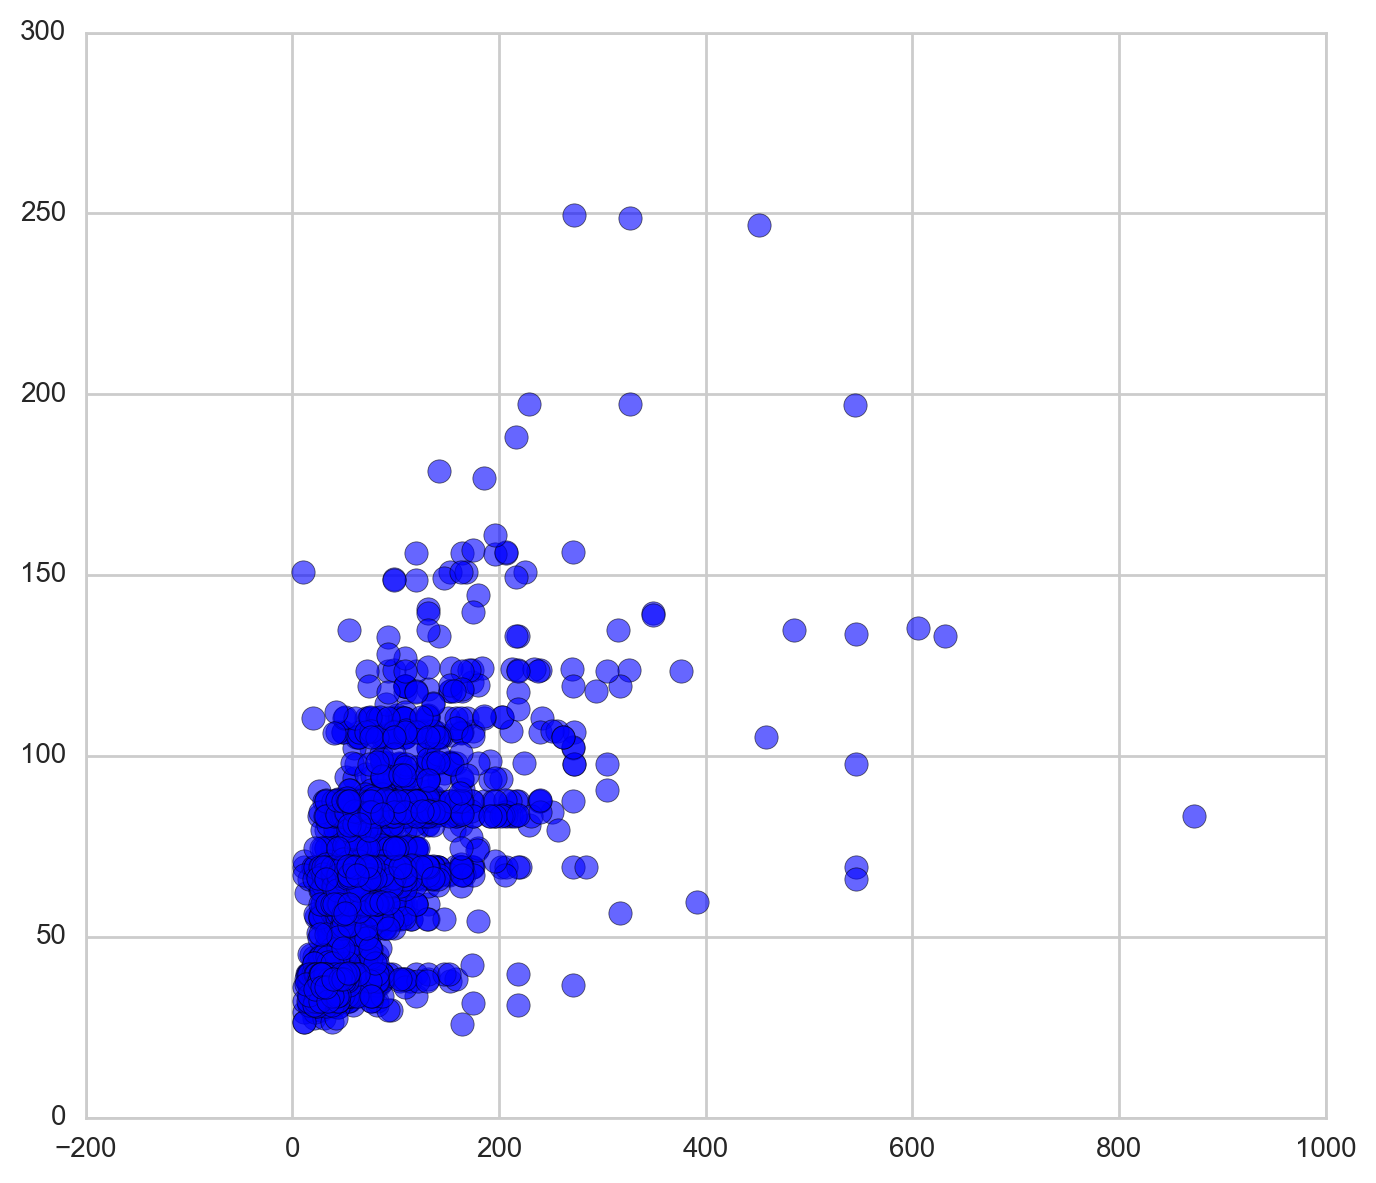

In [38]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(np.exp(y_test), np.exp(y_pred_lasso), s=70, alpha=0.6)
plt.show()

In [39]:
residuals = np.exp(y_test) - np.exp(y_pred_enet)

In [40]:
y_pred_enet_all = enet_berlin.fit(Xn_train, y_train).predict(Xn)


In [41]:
residuals_all = np.exp(y) - np.exp(y_pred_enet_all)

In [42]:
len(residuals_all)

14790

In [43]:
df['residuals'] = residuals_all

In [44]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type,residuals
0,8.0,10.0,10.0,0.057015,1206,52.508112,13.258975,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,1,11850,4541865,Entire home/apt,-1160.725112
1,1.0,2.0,2.0,0.057015,1206,52.489508,13.327372,30,3.0,Charlottenburg-Wilmersdorf,4.0,104.0,9,1,11850,3995729,Entire home/apt,16.476591


In [45]:
df = df[df['residuals']<0]

In [46]:
df = df.reset_index(drop=True)

In [47]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type,residuals
0,8.0,10.0,10.0,0.057015,1206,52.508112,13.258975,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,1,11850,4541865,Entire home/apt,-1160.725112
1,1.0,1.0,1.0,0.057015,1206,52.507770,13.284347,30,28.0,Charlottenburg-Wilmersdorf,4.5,17.0,9,43,11850,695511,Private room,-22.773079


In [48]:
df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Berlin_dfwithres.csv')